In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
df = pd.read_csv('stroke-dataset.csv')

In [3]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.shape

df.dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.stroke.nunique()

df.stroke.unique()

array([1, 0], dtype=int64)

In [6]:
other = df[df['gender'] == 'Other']
other
df = df.drop([3116])

In [7]:

df['smoking_status'] = df['smoking_status'].replace('Unknown', np.nan)
df = df.dropna()
#Private          2924
#Self-employed     819
#children          687
#Govt_job          657
#Never_worked       22
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 2)
df['ever_married'] = df['ever_married'].replace('Yes', 0)
df['ever_married'] = df['ever_married'].replace('No', 1)
df['work_type'] = df['work_type'].replace('Never_worked',0)
df['work_type'] = df['work_type'].replace('Govt_job',1)
df['work_type'] = df['work_type'].replace('children',2)
df['work_type'] = df['work_type'].replace('Self-employed',3)
df['work_type'] = df['work_type'].replace('Private',4)
df['Residence_type'] = df['Residence_type'].replace('Rural', 0)
df['Residence_type'] = df['Residence_type'].replace('Urban', 1)
df['smoking_status'] = df['smoking_status'].replace('never smoked', 0)
df['smoking_status'] = df['smoking_status'].replace('formerly smoked', 1)
df['smoking_status'] = df['smoking_status'].replace('smokes', 2)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,4,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,0,4,0,105.92,32.5,0,1
3,60182,2,49.0,0,0,0,4,1,171.23,34.4,2,1
4,1665,2,79.0,1,0,0,3,0,174.12,24.0,0,1
5,56669,1,81.0,0,0,0,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,1,82.0,1,0,0,3,0,71.97,28.3,0,0
5102,45010,2,57.0,0,0,0,4,0,77.93,21.7,0,0
5106,44873,2,81.0,0,0,0,3,1,125.20,40.0,0,0
5107,19723,2,35.0,0,0,0,3,0,82.99,30.6,0,0


Text(0, 0.5, 'Frequency')

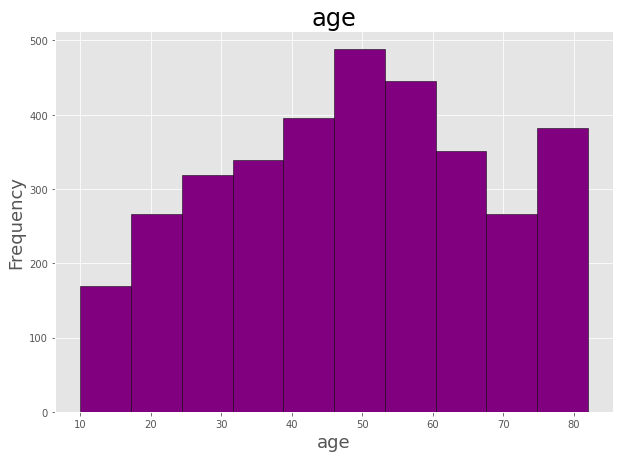

In [8]:
df.age.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('age', size=24)
plt.xlabel('age', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

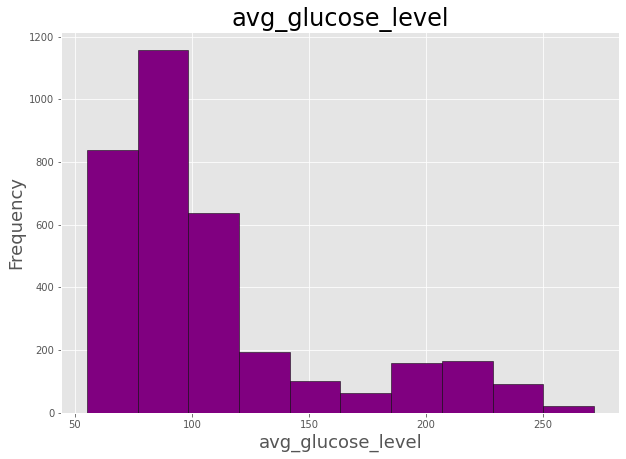

In [9]:
df.avg_glucose_level.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('avg_glucose_level', size=24)
plt.xlabel('avg_glucose_level', size=18)
plt.ylabel('Frequency', size=18)

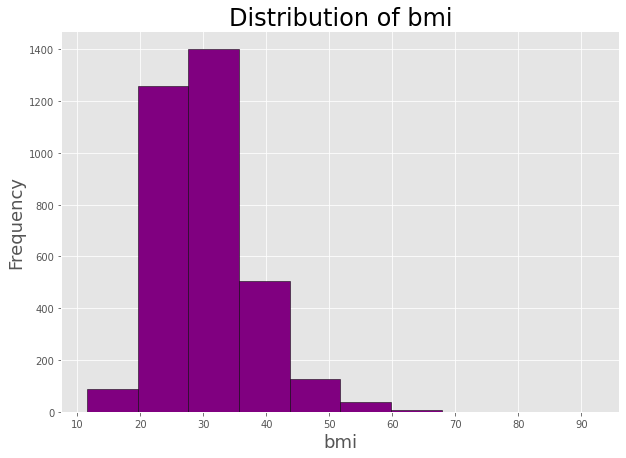

In [10]:
df.bmi.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of bmi', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('Frequency', size=18);

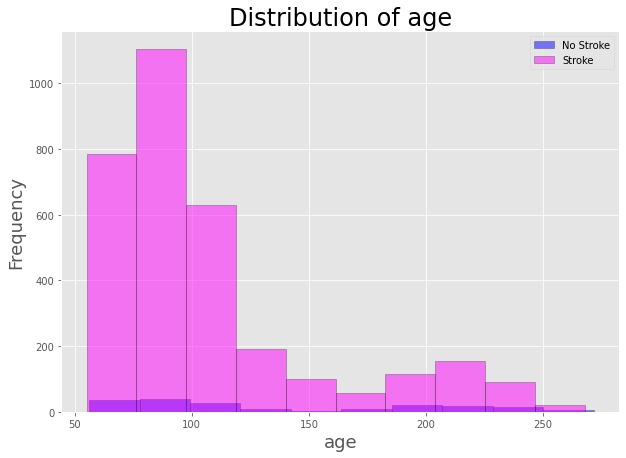

In [11]:
df[df['stroke'] == 1].avg_glucose_level.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['stroke'] == 0].avg_glucose_level.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['No Stroke', 'Stroke'])
plt.title('Distribution of age', size=24)
plt.xlabel('age', size=18)
plt.ylabel('Frequency', size=18);

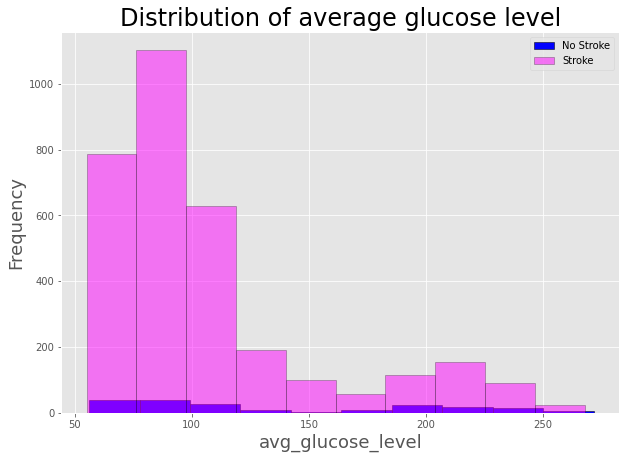

In [12]:
df[df['stroke'] == 1].avg_glucose_level.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
df[df['stroke'] == 0].avg_glucose_level.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['No Stroke', 'Stroke'])
plt.title('Distribution of average glucose level', size=24)
plt.xlabel('avg_glucose_level', size=18)
plt.ylabel('Frequency', size=18);

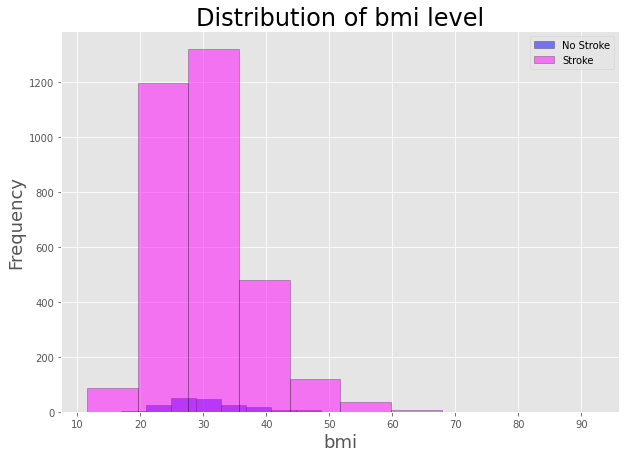

In [13]:
df[df['stroke'] == 1].bmi.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['stroke'] == 0].bmi.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['No Stroke', 'Stroke'])
plt.title('Distribution of bmi level', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('Frequency', size=18);

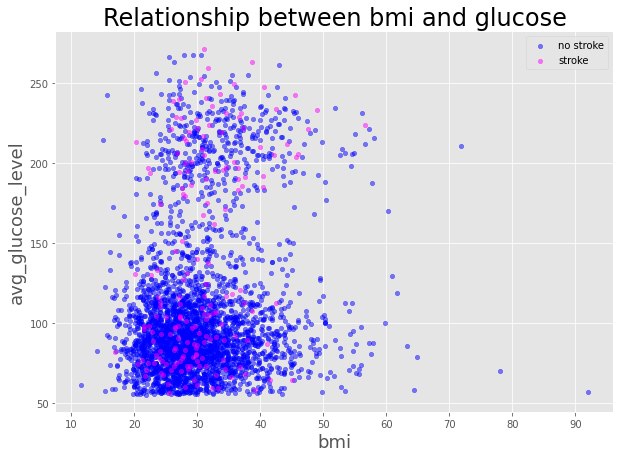

In [14]:
ax1 = df[df['stroke'] == 0].plot(kind='scatter', x='bmi', y='avg_glucose_level', color='blue', alpha=0.5, figsize=(10, 7))
df[df['stroke'] == 1].plot(kind='scatter', x='bmi', y='avg_glucose_level', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['no stroke', 'stroke'])
plt.title('Relationship between bmi and glucose', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('avg_glucose_level', size=18);

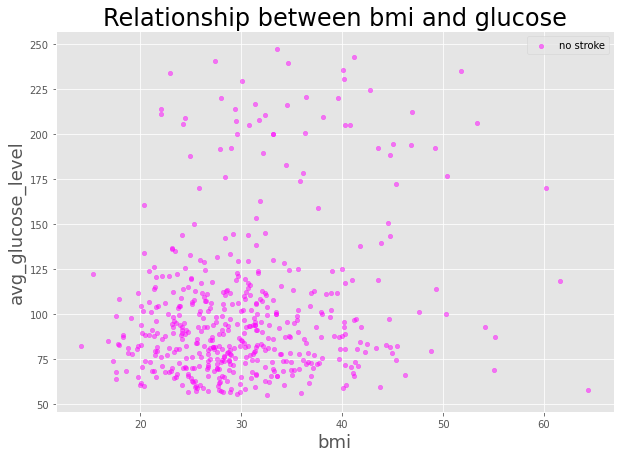

In [15]:
sample_no_stroke = df[df['stroke'] == 0].sample(500)
sample_no_stroke.plot(kind='scatter',  x='bmi', y='avg_glucose_level', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['no stroke'])
plt.title('Relationship between bmi and glucose', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('avg_glucose_level', size=18);

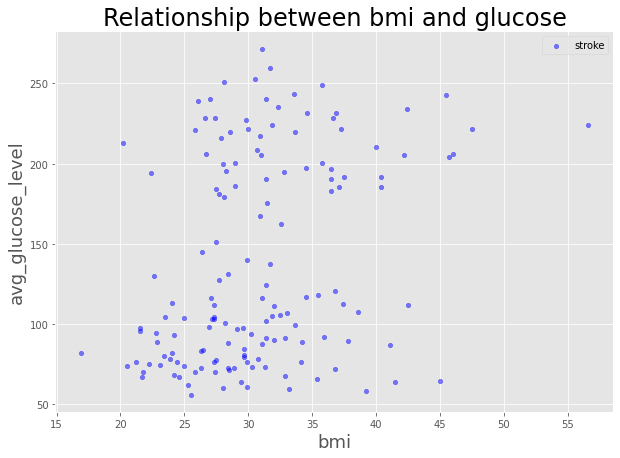

In [16]:
sample_stroke = df[df['stroke'] == 1].sample(150)
sample_stroke.plot(kind='scatter',  x='bmi', y='avg_glucose_level', color='blue', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['stroke'])
plt.title('Relationship between bmi and glucose', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('avg_glucose_level', size=18);

In [17]:
df_no_stroke = df[df['stroke'] == 0]
df_stroke = df[df['stroke'] == 1]

no_stroke_fit = np.polyfit(df_no_stroke.bmi, df_no_stroke.avg_glucose_level, 1)


stroke_fit = np.polyfit(df_stroke.bmi, df_stroke.avg_glucose_level, 1)


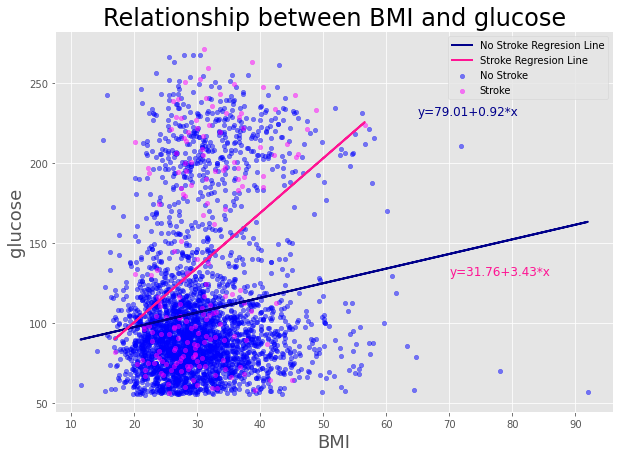

In [18]:
ax1 = df_no_stroke.plot(kind='scatter', x='bmi', y='avg_glucose_level', color='blue', alpha=0.5, figsize=(10, 7))
df_stroke.plot(kind='scatter', x='bmi', y='avg_glucose_level', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_no_stroke.bmi, no_stroke_fit[0] * df_no_stroke.bmi + no_stroke_fit[1], color='darkblue', linewidth=2)
plt.plot(df_stroke.bmi, stroke_fit[0] * df_stroke.bmi + stroke_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(no_stroke_fit[1], no_stroke_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(stroke_fit[1], stroke_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['No Stroke Regresion Line', 'Stroke Regresion Line', 'No Stroke', 'Stroke'])
plt.title('Relationship between BMI and glucose', size=24)
plt.xlabel('BMI', size=18)
plt.ylabel('glucose', size=18);

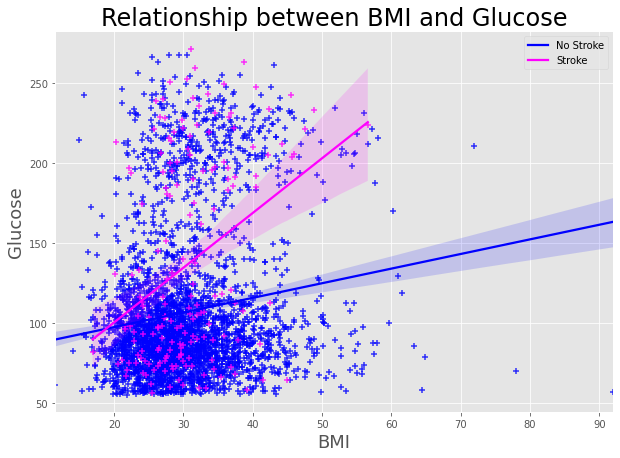

In [19]:

fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_no_stroke.bmi, y=df_no_stroke.avg_glucose_level, color='blue', marker='+')
sns.regplot(x=df_stroke.bmi, y=df_stroke.avg_glucose_level, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['No Stroke', 'Stroke'])
plt.title('Relationship between BMI and Glucose', size=24)
plt.xlabel('BMI', size=18)
plt.ylabel('Glucose', size=18);